In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Excercise 5.4 Compute the mean with Pandas

Consider the data set yk containing the five (n = 5) values $$y_1 = 4, y_2 = 2, y_3 = 3, y_4 = 2, y_5 = 4.$$
   1. Use Python to compute the mean.
   Hint: You can either
   (a) use a Python List and the build-in Python functions len() and sum()


In [3]:
list = [4, 2, 3, 2, 4]
print(f"Mean of {list} is {sum(list)/len(list)}")

Mean of [4, 2, 3, 2, 4] is 3.0


(b) use a Pandas DataFrame (or Series) to represent the data and the pd.mean()
    method (see Table 5.1 on page 66).

In [4]:
df = pd.Series([4, 2, 3, 2, 4])
df.mean()

3.0

## Exercise 5.9: Compute the variance with Pandas

Consider the data set yk containing the five (n = 5) values y1 = 4, y2 = 2, y3 = 3, y4 = 2
and y5 = 4. Use Python to compute the mean.
Hints: You can either
    1. use a Python List and the build-in Python functions len() and sum(), or

In [5]:
list = [4, 2, 3, 2, 4]
mean = sum(list) / len(list)
dev_f_mean = np.subtract(list, mean)

In [6]:
dev_f_mean_squared = np.square(dev_f_mean)

In [7]:
variance = sum(dev_f_mean_squared)/(len(list)-1)

In [8]:
variance

1.0

2. use a Pandas DataFrame (or Series) to represent the data and the pd.var() method
    (see Table 5.1 on page 66).

In [9]:
df = pd.Series([4, 2, 3, 2, 4])

In [10]:
df.var()

1.0

## Exercise 5.10: Summary statistics of popcorn data
In this exercise, we will continue the investigation of the popcorn data that we collected
during the exercise on page 44. Table 5.1 gives an overview of selected methods for statistical
summaries of a Pandas DataFrame and Series, and the notebook for this chapter
includes code for inspiration.

In [11]:
df = pd.read_csv('Popcorn_in_csv.csv')

1. Plot histograms of the popcorn’s short and long dimensions.

This has already been done in the Excercise 4.4 Presentation of popcorn data part 3, please check the Chapter 4 - excercises.ipynb

2. Calculate the mean and the median of both the short and long dimensions.

In [12]:
# mean of the long dimension
mean_long = df['Length'].mean()
print(f"Mean of the long dimension is {mean_long}")

Mean of the long dimension is 17.7


In [13]:
# Mean of the short/width dimension
mean_short = df['Width'].mean()
print(f"Mean of the short (width) dimension is {mean_short}")

Mean of the short (width) dimension is 9.0


3. Calculate standard deviation and coefficient of variations of both the short and long
dimensions.

First I will calculate the standard deviation and variance without use of any method, just to demonstrate it can be done without them to get the proper understanding "behind the scene"

In [14]:
df['Length(mean-xi)'] = df['Length'] - mean_long

In [15]:
df['Length(mean-xi)^2'] = df['Length(mean-xi)']**2

In [16]:
Lenght_variance = df['Length(mean-xi)^2'].sum()/len(df['Length(mean-xi)^2']) -1

In [17]:
print(f"The variance of the length is {Lenght_variance}")

The variance of the length is 74.30999999999999


In [19]:
Length_stand_dev = Lenght_variance**0.5
print(f"The standard deviation is {Length_stand_dev}")

The standard deviation is 8.620324819866127


In [20]:
print(f"The coefficient of variations of the lenght dimension is equal to {Length_stand_dev/mean_long}")

The coefficient of variations is equal to 0.4870240011223801


And now the short dimension with functions

In [22]:
Width_std_dev = df['Width'].std()
print(f"Standard deviation of the short dimension is {Width_std_dev}")

Standard deviation of the short dimension is 5.697502826812678


In [23]:
print(f"The coefficient of variation for the short dimension is equal to {Width_std_dev/mean_short}")

The coefficient of variation for the short dimension is equal to 0.6330558696458531


4. Calculate the quartiles and the interquartile range (IQR) of the long dimensions.

In [26]:
q1_long = df['Length'].quantile(0.25)
q2_long = df['Length'].quantile(0.5)
q3_long = df['Length'].quantile(0.75)

print(f"Q1 = {q1_long}, Q2 = {q2_long}, Q3 = {q3_long}")

Q1 = 8.0, Q2 = 18.0, Q3 = 23.0


In [27]:
IQR = q3_long - q1_long

5. Calculate the fences (Q $\pm$ 1.5IQR) of long dimensions and determine whether there
are any outliers.

In [38]:
Upper_fence = q3_long + 1.5*IQR

In [39]:
Upper_fence

45.5

In [41]:
df[df['Length'] > 45.5]

# There are 0 outliers

,Kernel ID,Poped,Length,Width,Color,Length(mean-xi),Length(mean-xi)^2


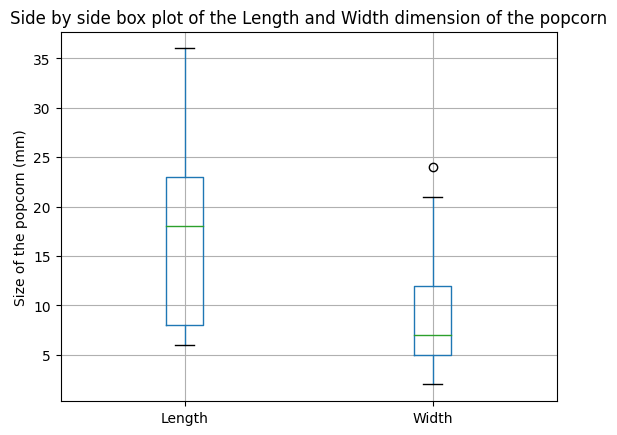

In [44]:
df.boxplot(column  = ['Length',
                      'Width'])
plt.ylabel('Size of the popcorn (mm)')
plt.title('Side by side box plot of the Length and Width dimension of the popcorn')
plt.show()
